Data Loaded Successfully ✅
    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428   Alex     Yangon        Member  Female   
1  226-31-3081   Giza  Naypyitaw        Normal  Female   
2  631-41-3108   Alex     Yangon        Normal  Female   
3  123-19-1176   Alex     Yangon        Member  Female   
4  373-73-7910   Alex     Yangon        Member  Female   

             Product line  Unit price  Quantity   Tax 5%     Sales       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

          Time      Payment    cogs  gross margin percentage  gross income  \
0   1:08:00 PM      Ewallet  522.83                 4.76190

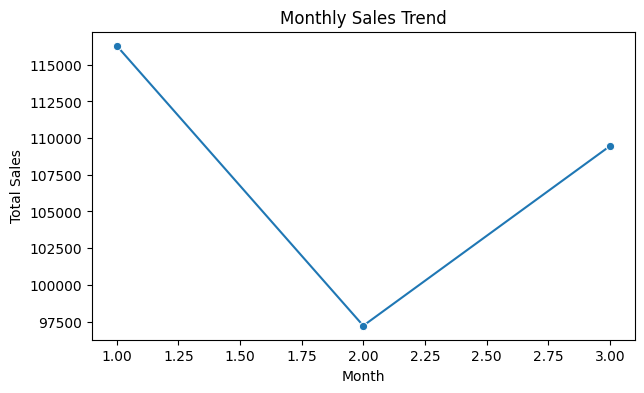


Mean Absolute Error: 31308.626999999993
R² Score: nan


C:\Users\sushm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


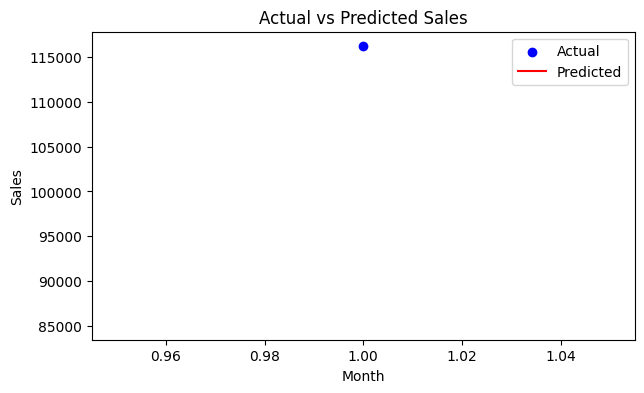

Data Loaded Successfully ✅
    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428   Alex     Yangon        Member  Female   
1  226-31-3081   Giza  Naypyitaw        Normal  Female   
2  631-41-3108   Alex     Yangon        Normal  Female   
3  123-19-1176   Alex     Yangon        Member  Female   
4  373-73-7910   Alex     Yangon        Member  Female   

             Product line  Unit price  Quantity   Tax 5%     Sales       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

          Time      Payment    cogs  gross margin percentage  gross income  \
0   1:08:00 PM      Ewallet  522.83                 4.76190

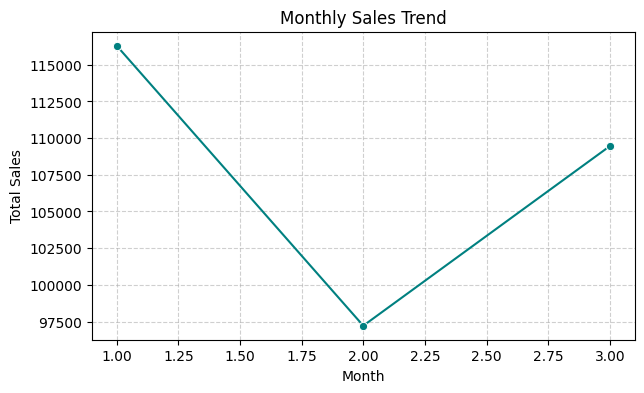


Mean Absolute Error: 6957.472666666668
R² Score: 0.12513636876364442


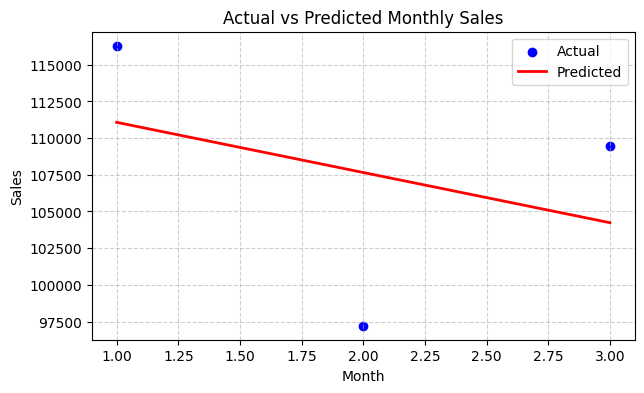

In [10]:
# Retail Sales Forecasting - by Sushma Koduri

# 1. Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# 2. Load dataset
data = pd.read_csv("supermarket_sales.csv")
print("Data Loaded Successfully ✅")
print(data.head())

# 3. Basic info
print("\nDataset Info:")
print(data.info())

# 4. Data Cleaning
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month

# 5. Group sales by month
monthly_sales = data.groupby('Month')['Sales'].sum().reset_index()
print("\nMonthly Sales Summary:")
print(monthly_sales)

# 6. Visualize monthly trend
plt.figure(figsize=(7,4))
sns.lineplot(x='Month', y='Sales', data=monthly_sales, marker='o', color='teal')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 7. Prepare data for prediction
X = monthly_sales[['Month']]
y = monthly_sales['Sales']

# 8. Train a simple regression model on full data (since only 3 months)
model = LinearRegression()
model.fit(X, y)

# 9. Predict and evaluate
y_pred = model.predict(X)
print("\nMean Absolute Error:", mean_absolute_error(y, y_pred))
print("R² Score:", r2_score(y, y_pred))

# 10. Plot actual vs predicted
plt.figure(figsize=(7,4))
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Predicted', linewidth=2)
plt.title('Actual vs Predicted Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [11]:
print(data.columns)


Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Sales', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Month'],
      dtype='object')
